##### Análise Gráfica do Dataset

In [89]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
%matplotlib inline

In [10]:
df = pd.read_csv("../data/diabetes_dataset.csv")

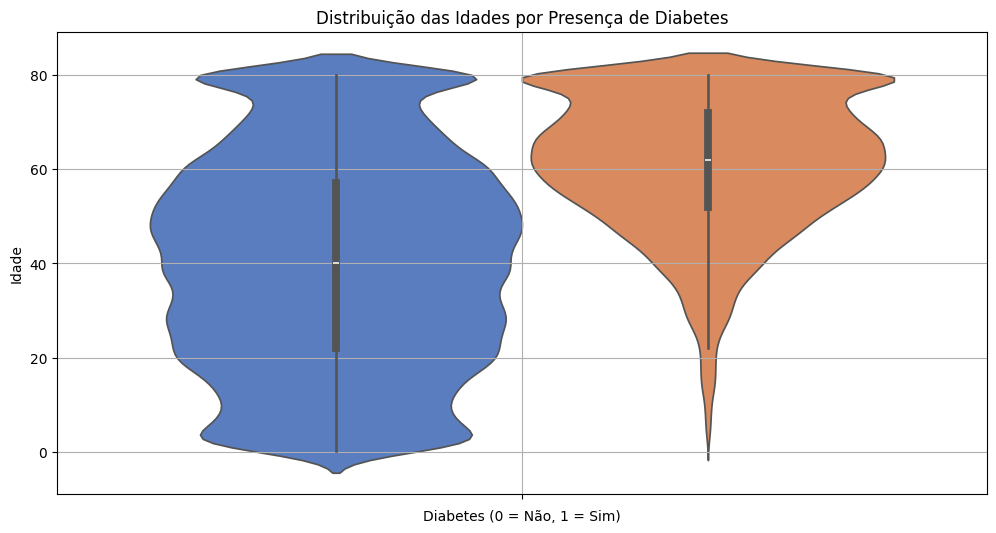

In [64]:
plt.figure(figsize=(12, 6))
sns.violinplot(hue='diabetes', y='age', data=df, palette='muted', legend=False)
plt.title('Distribuição das Idades por Presença de Diabetes')
plt.xlabel('Diabetes (0 = Não, 1 = Sim)')
plt.ylabel('Idade')
plt.grid(True)
plt.show()

In [69]:
gender_diabetes_count = df.groupby(['gender', 'diabetes']).size().reset_index(name='count')

fig = px.treemap(gender_diabetes_count,
                 path=['gender', 'diabetes'],
                 values='count',
                 color='count',
                 color_continuous_scale='greens',
                 title='Distribuição de Gêneros por Presença de Diabetes')

fig.show()

In [71]:
race_columns = ['race:AfricanAmerican', 'race:Asian', 'race:Caucasian', 'race:Hispanic', 'race:Other']
df[race_columns] = df[race_columns].replace({0: 'no', 1: 'yes'})

In [92]:
race_columns = ['race:AfricanAmerican', 'race:Asian', 'race:Caucasian', 'race:Hispanic', 'race:Other']
race_titles = ['Afro-Americano', 'Asiático', 'Caucasiano', 'Hispânico', 'Outro']

fig = make_subplots(rows=2, cols=3, subplot_titles=race_titles)

for i, race in enumerate(race_columns):
    counts = df[df[race] == 'yes']['diabetes'].value_counts()
    data = {
        'Status de Diabetes': ['Sim', 'Não'],
        'Contagem': [counts.get(1, 0), counts.get(0, 0)]
    }
    df_diabetes = pd.DataFrame(data)

    row = i // 3 + 1  
    col = i % 3 + 1   
    
    fig.add_trace(
        go.Bar(x=df_diabetes['Status de Diabetes'], y=df_diabetes['Contagem'], name=race_titles[i]),
        row=row, col=col
    )

fig.update_layout(title_text='Número de Pessoas com e sem Diabetes por Raça',
                  height=800, width=1750)

fig.show()

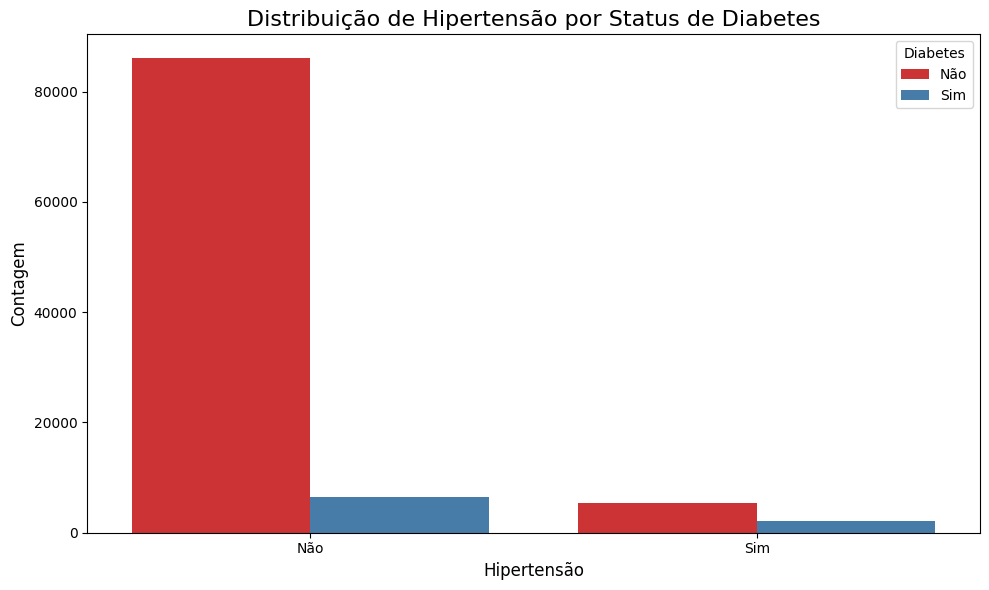

In [102]:
plt.figure(figsize=(10, 6))

sns.countplot(data=df, x='hypertension', hue='diabetes', palette='Set1')

plt.title('Distribuição de Hipertensão por Status de Diabetes', fontsize=16)
plt.xlabel('Hipertensão', fontsize=12)
plt.ylabel('Contagem', fontsize=12)
plt.xticks([0, 1], ['Não', 'Sim'])
plt.legend(title='Diabetes', labels=['Não', 'Sim'])

plt.tight_layout()
plt.show()

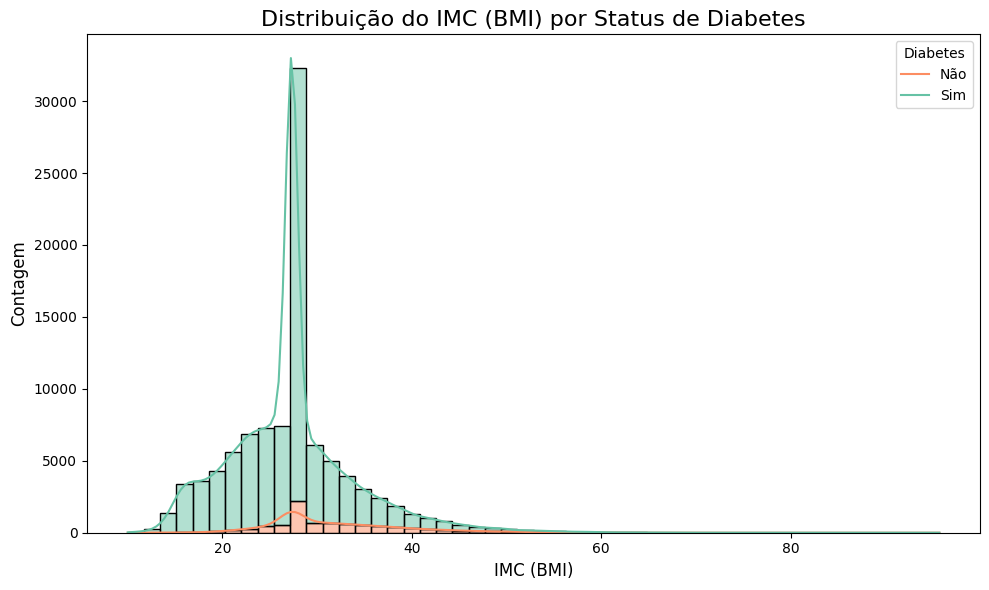

In [115]:
plt.figure(figsize=(10, 6))

sns.histplot(data=df, x='bmi', hue='diabetes', multiple='stack', kde=True, palette='Set2', bins=50)

plt.title('Distribuição do IMC (BMI) por Status de Diabetes', fontsize=16)
plt.xlabel('IMC (BMI)', fontsize=12)
plt.ylabel('Contagem', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title='Diabetes', labels=['Não', 'Sim'])

plt.tight_layout()
plt.show()

In [128]:
fig = px.box(df, 
             x='diabetes', 
             y='hbA1c_level', 
             color='diabetes',
             labels={'diabetes': 'Diabetes', 'hbA1c_level': 'Nível de hbA1c (%)'},
             title='Distribuição de Níveis de hbA1c por Status de Diabetes',
             color_discrete_map={0: '#636EFA', 1: '#EF553B'})

fig.update_layout(xaxis=dict(tickmode='array', tickvals=[0, 1], ticktext=['Não', 'Sim']),
                  legend_title_text='Diabetes', height=600)

fig.show()

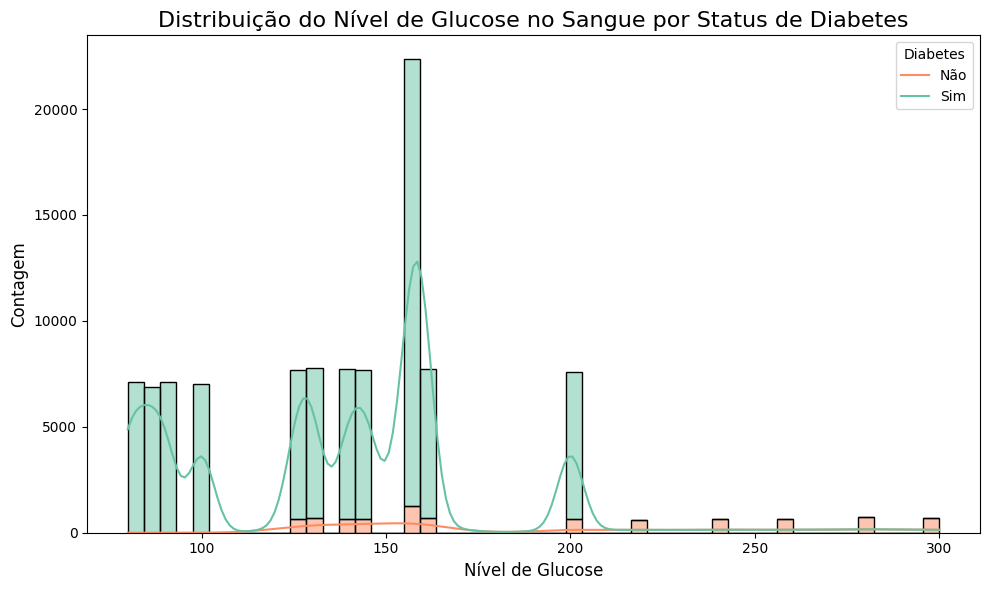

In [135]:
plt.figure(figsize=(10, 6))

sns.histplot(data=df, x='blood_glucose_level', hue='diabetes', multiple='stack', kde=True, palette='Set2', bins=50)

plt.title('Distribuição do Nível de Glucose no Sangue por Status de Diabetes', fontsize=16)
plt.xlabel('Nível de Glucose', fontsize=12)
plt.ylabel('Contagem', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title='Diabetes', labels=['Não', 'Sim'])

plt.tight_layout()
plt.show()